In [1]:
# Down-sampling involves randomly removing observations from the majority class 
# to prevent its signal from dominating the learning algorithm.
# Most common method is resampling without replacement

# - First, we'll separate observations from each class into different DataFrames.
# - Next, we'll resample the majority class without replacement, setting the number 
# of samples to match that of the minority class.
# - Finally, we'll combine the down-sampled majority class DataFrame with 
# the original minority class DataFrame.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# module for resampling
from sklearn.utils import resample

In [4]:
# os.getcwd()

In [5]:
# os.listdir(os.getcwd())

In [6]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_binary_tags_merged_nan_removed.csv")
all_param_df.shape


(31686, 357)

In [7]:
# separate classes in dataframes of success/failure
df_fail = all_param_df[all_param_df.suc_class==0]
df_succ = all_param_df[all_param_df.suc_class==1]

In [8]:
df_fail.shape

(30883, 357)

In [9]:
df_succ.shape

(803, 357)

In [10]:
# Downsample Majority class
df_fail_downsample = resample(df_fail, replace=False, n_samples=1000, random_state=2)

# combine success with downsampled majority class into new dataframe
df_downsampled = pd.concat([df_fail_downsample, df_succ])

# display new class counts
df_downsampled.suc_class.value_counts()

0    1000
1     803
Name: suc_class, dtype: int64

In [11]:
# # reindex the new upsampled dataframe
# df_upsampled.reindex()

In [12]:
# df_upsampled

In [13]:
# # read the csv y_data file into Pandas 
# y_parm_df = pd.read_csv("reduced_data\\y_params.csv")
# y_parm_df.shape

In [14]:
# using binary classification for logistic regression
y_class = df_downsampled['suc_class']

In [15]:
y_class

8031     0
21081    0
5392     0
12192    0
3521     0
        ..
29820    1
30562    1
30598    1
30660    1
31478    1
Name: suc_class, Length: 1803, dtype: int64

In [16]:
# create new X parameters df
x_data = df_downsampled.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [17]:
x_data.shape


(1803, 346)

In [18]:
#label encode the developer name

In [19]:
x_data['developer']=x_data['developer'].astype('category')

In [20]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
8031,0,326,Deceptive Games Ltd.,599,80,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21081,0,1243,THQ Nordic,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5392,0,1156,BRHP,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12192,0,1176,Softwaves Dist.,499,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3521,68,449,Slitherine Ltd.,3999,80,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#label encode the publisher name

In [22]:
x_data['publisher']=x_data['publisher'].astype('category')

In [23]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
8031,0,326,264,599,80,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21081,0,1243,1011,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5392,0,1156,112,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12192,0,1176,957,499,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3521,68,449,948,3999,80,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [25]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [27]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [28]:
# Train model
y = y_train
X = X_train_scaled

clf_2 = LogisticRegression(max_iter=1000).fit(X, y)

In [29]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_2.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_2.score(X_test_scaled, y_test)}")

Training Data Score: 0.4474852071005917
Testing Data Score: 0.811529933481153


In [30]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_2.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       250
           1       0.81      0.76      0.78       201

    accuracy                           0.81       451
   macro avg       0.81      0.81      0.81       451
weighted avg       0.81      0.81      0.81       451



In [31]:
# thinking about baseline results:
# Support is balanced due to sampling adjustments
# Percision: for no success: 75%, for successful games: 95%
# Recall: Fraction of positives found, 98% for 0, 61% for 1
# f1 score: 81%

<AxesSubplot:>

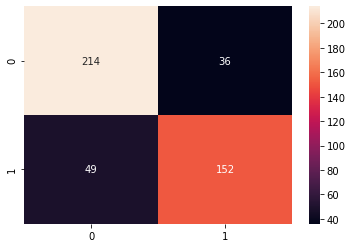

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_2.predict(X_test_scaled)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [33]:
# Co-efficient importance

print(x_data.columns.shape, clf_2.coef_.shape)
new_col = np.reshape(clf_2.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
0,metascore,2.105194
3,maxprice,1.925490
247,tagmartialarts,1.800851
160,tagjrpg,1.512637
342,tagclicker,1.276040
4,maxdiscount,1.218195
148,tagepisodic,1.202456
150,tagshootemup,1.102141
65,tagcrafting,1.065371
234,taginventorymanagement,1.044276


In [34]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = clf_2.predict_proba(X_test)
prob_y_2

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

In [35]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [36]:
# Print AUROC of SMOTE model
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# It tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
print( roc_auc_score(y_test, prob_y_2) )

0.5031044776119403


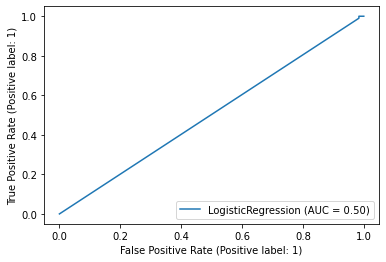

In [37]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_2, X_test, y_test)  
plt.show()